In [114]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
np.set_printoptions(threshold=sys.maxsize)
from pylab import rcParams

## Смотрим на содержание файла netCDF

In [44]:
my_example_nc_file = '/media/julia/Data/ITMO_NEMO/dataset-satellite-sea-level-global-67d81189-8790-425d-9891-63be1e0a13f0/dt_global_twosat_phy_l4_20140101_vDT2018.nc'
ds = nc.Dataset(my_example_nc_file)
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 crs()
    comment: This is a container variable that describes the grid_mapping used by the data in this file. This variable does not contain any data; only information about the geographic coordinate system.
    grid_mapping_name: latitude_longitude
    inverse_flattening: 298.257
    semi_major_axis: 6378136.3
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    axis: T
    calendar: gregorian
    long_name: Time
    standard_name: time
    units: days since 1950-01-01 00:00:00
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    axis: Y
    bounds: lat_bnds
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    valid_max: 89.875
    valid_min: -89.875
unlimited dimensions: 
current shape = (720,)
filli

## Необходимая величина - sea_surface_height_above_geoid - 'adt'

In [45]:
print(ds['adt'])

<class 'netCDF4._netCDF4.Variable'>
int32 adt(time, latitude, longitude)
    _FillValue: -2147483647
    comment: The absolute dynamic topography is the sea surface height above geoid; the adt is obtained as follows: adt=sla+mdt where mdt is the mean dynamic topography; see the product user manual for details
    coordinates: longitude latitude
    grid_mapping: crs
    long_name: Absolute dynamic topography
    scale_factor: 0.0001
    standard_name: sea_surface_height_above_geoid
    units: m
unlimited dimensions: 
current shape = (1, 720, 1440)
filling on


## Узнаем номер ячейки, в которую попадают наши координаты 

In [129]:
lat_array=np.array(ds['latitude'])
lon_array=np.array(ds['longitude'])

print(lat_array)
print(lon_array)

# Размер ячейки по широте и долготе 0.250х0.250

[-89.875 -89.625 -89.375 -89.125 -88.875 -88.625 -88.375 -88.125 -87.875
 -87.625 -87.375 -87.125 -86.875 -86.625 -86.375 -86.125 -85.875 -85.625
 -85.375 -85.125 -84.875 -84.625 -84.375 -84.125 -83.875 -83.625 -83.375
 -83.125 -82.875 -82.625 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125
 -80.875 -80.625 -80.375 -80.125 -79.875 -79.625 -79.375 -79.125 -78.875
 -78.625 -78.375 -78.125 -77.875 -77.625 -77.375 -77.125 -76.875 -76.625
 -76.375 -76.125 -75.875 -75.625 -75.375 -75.125 -74.875 -74.625 -74.375
 -74.125 -73.875 -73.625 -73.375 -73.125 -72.875 -72.625 -72.375 -72.125
 -71.875 -71.625 -71.375 -71.125 -70.875 -70.625 -70.375 -70.125 -69.875
 -69.625 -69.375 -69.125 -68.875 -68.625 -68.375 -68.125 -67.875 -67.625
 -67.375 -67.125 -66.875 -66.625 -66.375 -66.125 -65.875 -65.625 -65.375
 -65.125 -64.875 -64.625 -64.375 -64.125 -63.875 -63.625 -63.375 -63.125
 -62.875 -62.625 -62.375 -62.125 -61.875 -61.625 -61.375 -61.125 -60.875
 -60.625 -60.375 -60.125 -59.875 -59.625 -59.375 -5

### Сделаем координатную сетку

In [97]:
coordinates=np.array(np.meshgrid(lat_array, lon_array)).T
#print(coordinates)
print(coordinates[sh_lat_ind, sh_lon_ind])

[53.125  0.125]


## Извлекаем значения уровня моря из ячейки, индекс которой получили

In [95]:
min_lon=19.875
min_lat=77.625

lon_ind = np. where(lon_array == min_lon)[0][0]
lat_ind = np. where(lat_array == min_lat)[0][0]
print(lon_ind)
print(lat_ind)


sea_level=np.array(ds['adt'][:, :, :])[0]
#print(sea_level)
print(sea_level.shape)
print(sea_level[lat_ind, lon_ind])

79
670
(720, 1440)
-0.2675


## Запускаем в цикле, формируем временной ряд

In [130]:
input_folder='/media/julia/Data/ITMO_NEMO/dataset-satellite-sea-level-global-67d81189-8790-425d-9891-63be1e0a13f0'

dates_list=[]
shpitz_timeline=[]

for file in os.listdir(input_folder):
    #print(file)
    try:
        ds = nc.Dataset(os.path.join(input_folder, file))
    except Exception as e:
        print(e)
        pass
    date=file.split('_')[-2]
    dates_list.append(date)
    sea_level=np.array(ds['adt'][:, :, :])[0]
    min_lon=19.875
    min_lat=75.875

    lon_ind = np. where(lon_array == min_lon)[0][0]
    lat_ind = np. where(lat_array == min_lat)[0][0]
    
    value=sea_level[lat_ind, lon_ind]
    shpitz_timeline.append(value)
#print(shpitz_timeline)
#print(dates_list)

[Errno -51] NetCDF: Unknown file format: b'/media/julia/Data/ITMO_NEMO/dataset-satellite-sea-level-global-67d81189-8790-425d-9891-63be1e0a13f0/dt_global_twosat_phy_l4_20140101_vDT2018.nc.aux.xml'


### Сортировка и запись набора данных в csv

In [128]:
import pandas as pd

dic={'dates' : dates_list,
     'sea_level' : shpitz_timeline}
pd_df = pd.DataFrame(dic, columns = ['dates', 'sea_level'])
pd_df['dates'] =  pd.to_datetime(pd_df['dates'], format='%Y%m%d')
pd_df=pd_df.sort_values(by=['dates'])
pd_df.to_csv('/media/julia/Data/ITMO_NEMO/2014_19.875_75.875.csv', sep='\t')
pd_df

,dates,sea_level
0,2014-01-01,-0.2052
1,2014-01-01,-0.2052
2,2014-01-02,-0.2025
3,2014-01-03,-0.2009
4,2014-01-04,-0.1966
...,...,...
249,2014-12-27,-0.2679
250,2014-12-28,-0.2632
251,2014-12-29,-0.2609
252,2014-12-30,-0.2635


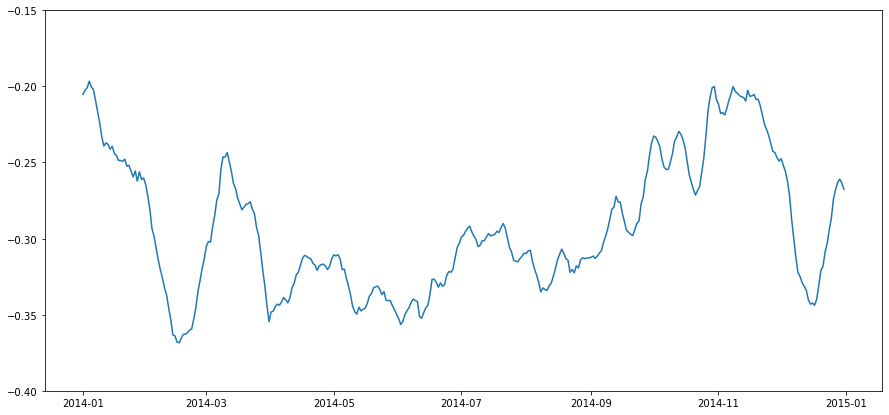

In [127]:
rcParams['figure.figsize'] = 15, 7
plt.plot(pd_df['dates'], pd_df['sea_level'])
plt.ylim(-0.4,-0.15)
plt.show()